C:\Users\Hriday\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


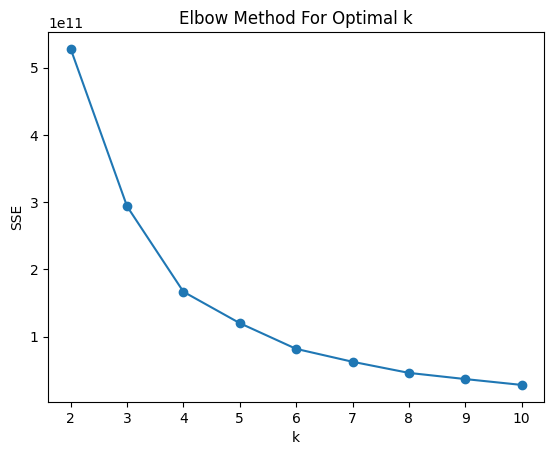

NameError: name 'xgb' is not defined

In [ ]:
# ==========================
# 📊 K Means Advanced Clustering
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import optuna
import plotly.express as px
X_clustering = df[['TemperatureAnomaly', 'Value']]

# Elbow method
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)
    sse.append(kmeans.inertia_)

plt.plot(range(2,11), sse, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

best_k = 4

kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_clustering)

# ==========================
# 🗺️ Map Visualization of Clusters
# ==========================

fig = px.scatter_geo(df, locations='Country', locationmode='country names',
                     color='Cluster',
                     hover_name='Country',
                     projection='natural earth')
fig.update_layout(title='Country Clusters based on Climate and Production')
fig.show()

In [ ]:
#data loading
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

path='final_imputed_data.csv'
df = pd.read_csv(path)
df.head()

Country  AttributeID             Attribute   Value  Year  \
0  Albania           29    Arabica Production    85.0  2023   
1  Albania           90          Bean Exports    17.4  2023   
2  Albania           58          Bean Imports    80.0  2023   
3  Albania           20      Beginning Stocks  2721.6  2023   
4  Albania          125  Domestic Consumption    80.0  2023   

   TemperatureAnomaly  Country_encoded  Attribute_encoded  
0            0.836803                0                  0  
1            0.836803                0                  1  
2            0.836803                0                  2  
3            0.836803                0                  3  
4            0.836803                0                  4

Regression model for yearly production

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Define features and target
X = df[['Year', 'TemperatureAnomaly', 'Country_encoded', 'Attribute_encoded']]
y = df['Value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
lr_model = LinearRegression().fit(X_train, y_train)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
xgb_model = XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Evaluate models
def evaluate_model(name, model):
    preds = model.predict(X_test)
    print(f"{name} → MSE: {mean_squared_error(y_test, preds):,.2f}, R²: {r2_score(y_test, preds):.4f}")

evaluate_model("Linear Regression", lr_model)
evaluate_model("Random Forest", rf_model)
evaluate_model("XGBoost", xgb_model)

# Prediction for a real scenario
# Step 1: Fit label encoders again using same columns
le_country = LabelEncoder()
df['Country_encoded'] = le_country.fit_transform(df['Country'])

le_attr = LabelEncoder()
df['Attribute_encoded'] = le_attr.fit_transform(df['Attribute'])

# Step 2: Encode input values using fitted encoders
country = "Brazil"
attribute = "Arabica Production"
year = 2025
temperature = 1.3

country_encoded = le_country.transform([country])[0]
attribute_encoded = le_attr.transform([attribute])[0]

# Step 3: Make prediction
sample_input = pd.DataFrame([[year, temperature, country_encoded, attribute_encoded]], columns=X.columns)
predicted_value = xgb_model.predict(sample_input)[0]

print(f"\n📊 Predicted Coffee Production for {country} in {year} (Temp anomaly {temperature}°C): {predicted_value:,.2f} kg")


Linear Regression → MSE: 23,653,564.87, R²: 0.0222
Random Forest → MSE: 881,966.03, R²: 0.9635
XGBoost → MSE: 2,013,787.91, R²: 0.9168

📊 Predicted Coffee Production for Brazil in 2025 (Temp anomaly 1.3°C): 44,907.95 kg


Future coffee profuction by year prediction using prophet

In [2]:
from pickle import dump, load
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Aggregate total global coffee production per year
ts_df = df.groupby('Year')['Value'].sum().reset_index()
ts_df.columns = ['ds', 'y']  # Prophet requires 'ds' and 'y' column names
ts_df['ds'] = pd.to_datetime(ts_df['ds'], format='%Y')  # Ensure datetime format

# 2. Train Prophet model
prophet = Prophet()
prophet.fit(ts_df)

# 3. Forecast for 15 future years
future = prophet.make_future_dataframe(periods=15, freq='Y')
forecast = prophet.predict(future)

# 4. Extract and display forecast for 2030 and 2035
for year_check in [2030, 2035]:
    row = forecast[forecast['ds'].dt.year == year_check]
    if not row.empty:
        forecast_val = row['yhat'].values[0]
        print(f"📈 Forecasted Global Coffee Production in {year_check}: {forecast_val:,.2f} kg")
    else:
        print(f"⚠️ Year {year_check} is not available in the forecast. Consider increasing 'periods=' in make_future_dataframe().")

# 5. Plot the full forecast
fig = prophet.plot(forecast)
plt.title("☕ Global Coffee Production Forecast")
plt.xlabel("Year")
plt.ylabel("Total Production (kg)")
plt.grid(True)
plt.show()

with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(model, f)

d:\Aryan Final Desktop DATA\aryan\llm_project\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


NameError: name 'df' is not defined

Classifier wether country wise production low or high

In [3]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Step 1: Binary target — 1 if above median, else 0
median_prod = df['Value'].median()
df['High_Production'] = (df['Value'] > median_prod).astype(int)

# Step 2: Prepare input features
X_cls = df[['Year', 'TemperatureAnomaly', 'Country_encoded', 'Attribute_encoded']]
y_cls = df['High_Production']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Step 3: Train model
clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf.fit(X_train_c, y_train_c)

# Step 4: Evaluate model
y_pred_c = clf.predict(X_test_c)
print(f"✅ Accuracy: {accuracy_score(y_test_c, y_pred_c):.4f}")
print("\n🧾 Classification Report:\n", classification_report(y_test_c, y_pred_c))


✅ Accuracy: 0.8990

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      8330
           1       0.90      0.90      0.90      8504

    accuracy                           0.90     16834
   macro avg       0.90      0.90      0.90     16834
weighted avg       0.90      0.90      0.90     16834



C:\Users\Hriday\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [18:57:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# Prediction Scenario
country = 0 #albania
attribute = 1  #bean export
year = 2024
temperature = 1.1


sample_input = pd.DataFrame([[year, temperature, country, attribute]], columns=X_cls.columns)

# Predict
pred_label = clf.predict(sample_input)[0]
confidence = clf.predict_proba(sample_input)[0][pred_label]

# Display result
production_class = "HIGH" if pred_label == 1 else "LOW"
print(f"\n🔮 Predicted Production for Albania in {year} (Bean Export) with anomaly {temperature}°C:")
print(f"→ Expected: **{production_class}** production (Confidence: {confidence:.2%})")



🔮 Predicted Production for Albania in 2024 (Bean Export) with anomaly 1.1°C:
→ Expected: **LOW** production (Confidence: 99.81%)


In [ ]:
# Prediction Scenario
country = 34 # Guinea
attribute = 12 # Robusta Production
year = 2027
temperature = -0.43


sample_input = pd.DataFrame([[year, temperature, country, attribute]], columns=X_cls.columns)

# Predict
pred_label = clf.predict(sample_input)[0]
confidence = clf.predict_proba(sample_input)[0][pred_label]

# Display result
production_class = "HIGH" if pred_label == 1 else "LOW"
print(f"\n🔮 Predicted Production for Guinea in {year} (Robusta Production) with anomaly {temperature}°C:")
print(f"→ Expected: **{production_class}** production (Confidence: {confidence:.2%})")



🔮 Predicted Production for Guinea in 2027 (Robusta Production) with anomaly -0.43°C:
→ Expected: **HIGH** production (Confidence: 54.95%)


In [ ]:
# Prediction Scenario
country = 89 #vietnam
attribute = 12 #robusta production
year = 2027
temperature = -0.01


sample_input = pd.DataFrame([[year, temperature, country, attribute]], columns=X_cls.columns)

# Predict
pred_label = clf.predict(sample_input)[0]
confidence = clf.predict_proba(sample_input)[0][pred_label]

# Display result
production_class = "HIGH" if pred_label == 1 else "LOW"
print(f"\n🔮 Predicted Production for Vietnam in {year} (Robusta Production) with anomaly {temperature}°C:")
print(f"→ Expected: **{production_class}** production (Confidence: {confidence:.2%})")



🔮 Predicted Production for Guinea in 2027 (Robusta Production) with anomaly -0.01°C:
→ Expected: **HIGH** production (Confidence: 99.61%)
